# Improvement in classification, based on feature selection
Using the information about the top
correlating features obtained in item (4), transform the full data set **`train_smpl`** so as to keep the
following attributes:
* Using only the top 5 pixels from each **`train_smpl_\<label>`**.
* Using only the top 10 pixels from each **`train_smpl_\<label>`**.
* Using only the top 20 pixels from each **`train_smpl_\<label>`**.
* You will have three data sets, with approximately 50, 100 and 200 features (pixels) each.
Repeat the experiment described in item (3) on these three data sets.

In [1]:
import numpy as np
from IPython.utils import io

In [2]:
from Scripts import pixelFinder as pf 
from Scripts.NaiveBayse import NaiveBayseGaussian as nbg
from Scripts import helperfn as hf
from Scripts import plotScripts as ps
%load_ext autoreload
%autoreload 2


In [4]:
pixel_order = pf.get_top_pixels(2304)

In [5]:
labels = hf.get_labels()
x_data = hf.get_data_noresults()

In [6]:
scores_list = nbg.run_classifier(x_data, labels, pixel_order,result_label_set=(0,11), n_pixels = 20, balance_classes=True, random_state=89)

running all classifiers, could be slow
Progress: [###################-] 95.2%
Classifying pixel:  20


In [7]:
train_scores , test_scores = ps.unzip_all_scores(scores_list)

### Print line chart

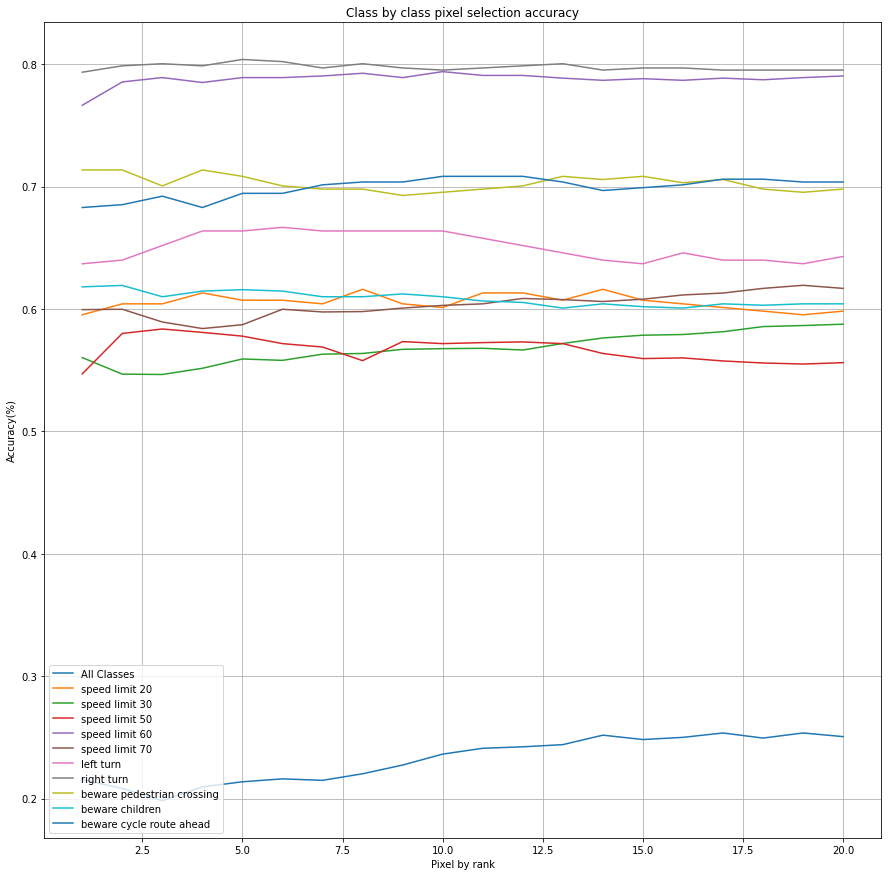

In [8]:
ps.plot_line_graph(np.array(train_scores))

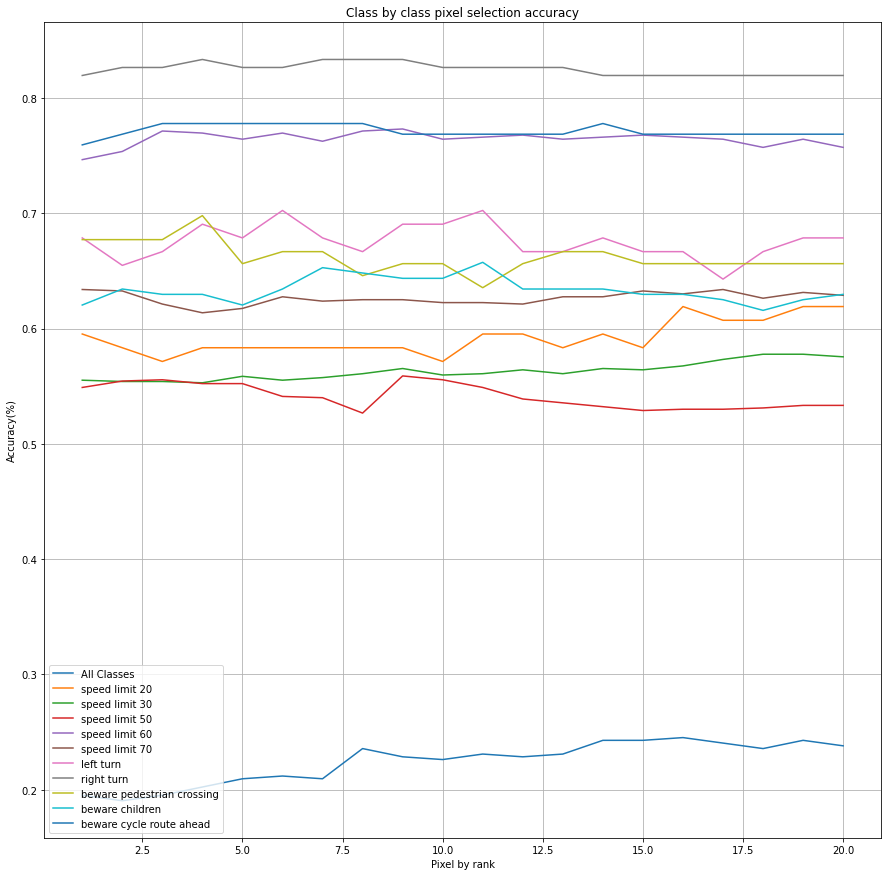

In [9]:
ps.plot_line_graph(np.array(test_scores))

In [10]:
best_pixel_depth = pf.get_best_n_pixels_all_classes(np.array(test_scores))

In [11]:
classifiers_5_pixels, scores_5_pixels, dataset_5_pixels = nbg.build_classifiers(x_data, labels, hf.grab_n_pixels(pixel_order, 5), balance_classes=True, random_state=89)
classifiers_10_pixels, scores_10_pixels, dataset_10_pixels = nbg.build_classifiers(x_data, labels, hf.grab_n_pixels(pixel_order, 10), balance_classes=True, random_state=89)
classifiers_20_pixels, scores_20_pixels, dataset_20_pixels = nbg.build_classifiers(x_data, labels, hf.grab_n_pixels(pixel_order, 20), balance_classes=True, random_state=89)
classifiers_our_pixels, scores_our_pixels, dataset_our_pixels = nbg.using_n_pixelrun_classifier(x_data, labels, hf.grab_n_pixels(pixel_order, 20), best_pixel_depth, balance_classes=True, random_state=89, print_scores=False)

Scores for dataset:  All Classes
Training data score:  0.21369047619047618
Testing data score:  0.20952380952380953
--------------------------------------
Scores for dataset:  speed limit 20
Training data score:  0.6071428571428571
Testing data score:  0.5833333333333334
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.5591216216216216
Testing data score:  0.5585585585585585
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.5777777777777777
Testing data score:  0.5522222222222222
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.7890070921985816
Testing data score:  0.7641843971631206
--------------------------------------
Scores for dataset:  speed limit 70
Training data score:  0.5871212121212122
Testing data score:  0.6174242424242424
--------------------------------------
Scores for dataset:  left turn
Training data score:  0.6636904761

In [12]:
our_pixel_scores = []

for i in range(0,11):
    our_pixel_scores.append(scores_our_pixels[i][0])

In [13]:
train_score_5_pixels , test_score_5_pixels = ps.convert_percentage(ps.unzip_scores(scores_5_pixels))
train_score_10_pixels , test_score_10_pixels = ps.convert_percentage(ps.unzip_scores(scores_10_pixels))
train_score_20_pixels , test_score_20_pixels = ps.convert_percentage(ps.unzip_scores(scores_20_pixels))
train_score_our_pixels , test_score_our_pixels = ps.convert_percentage(ps.unzip_scores(our_pixel_scores))



train_score_5_pixels = train_score_5_pixels.astype(int)
test_score_5_pixels = test_score_5_pixels.astype(int)

train_score_10_pixels = train_score_10_pixels.astype(int)
test_score_10_pixels = test_score_10_pixels.astype(int)

train_score_20_pixels = train_score_20_pixels.astype(int)
test_score_20_pixels = test_score_20_pixels.astype(int)

train_score_our_pixels = train_score_our_pixels.astype(int)
test_score_our_pixels = test_score_our_pixels.astype(int)


test_data = [test_score_5_pixels.astype(int), test_score_10_pixels.astype(int), test_score_20_pixels.astype(int), test_score_our_pixels.astype(int)]
train_data = [train_score_5_pixels.astype(int), train_score_10_pixels.astype(int), train_score_20_pixels.astype(int), train_score_our_pixels.astype(int)]



### Plot graphs


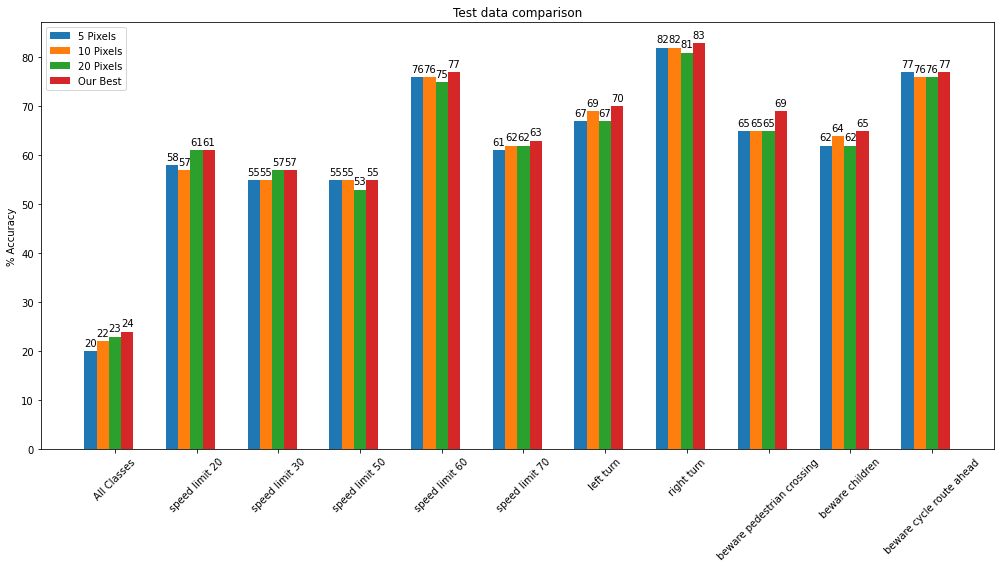

In [14]:
ps.plot_scores(test_data, ['5 Pixels','10 Pixels','20 Pixels','Our Best'], title='Test data comparison')


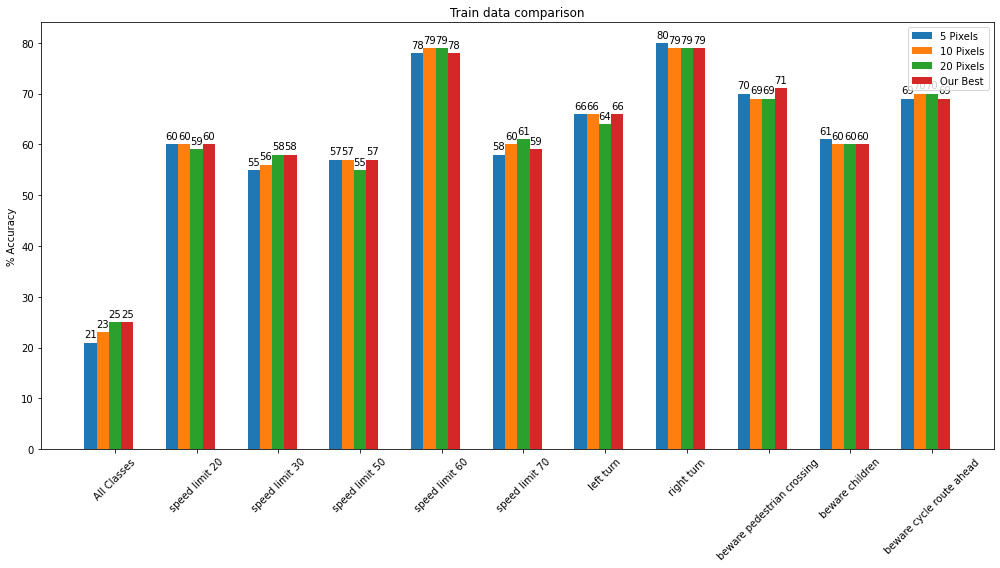

In [15]:
ps.plot_scores(train_data, ['5 Pixels','10 Pixels','20 Pixels','Our Best'], title='Train data comparison')
